In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math
from matplotlib.patches import FancyArrowPatch
from ipywidgets import Output

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

%cd /content/drive/MyDrive/Dataset/


/content/drive/MyDrive/Dataset


In [ ]:
!cat data.txt

In [27]:
# Assuming your data is stored in a file named 'data.txt'
file_path = '/content/drive/MyDrive/Dataset/data.txt'


# Lists to store the values
ar = []
br = []

# Read the file and extract values for the first 10 lines
with open(file_path, 'r') as file:
    for i, line in enumerate(file):
        if i >= 6:
            break  # Stop reading after 10 lines

        # Remove leading and trailing whitespace, and invisible characters
        cleaned_line = line.strip().replace('\ufeff', '')

        # Split each cleaned line into values
        values = cleaned_line.split(',')

        # Extract x and y values (first and second values) and divide by 100, round to 1 decimal place
        x, y = round(float(values[0]) * 1, 1), round(float(values[1]) * 100, 1)
        ar.append([x, y])

        # Extract z value (third value)
        z = int(values[2])
        br.append(z)

# Print the arrays
print("ar =", ar)
print("br =", br)



ar = [[34.6, 7802.5], [30.3, 4389.5], [35.8, 7290.2], [60.2, 8630.9], [79.0, 7534.4], [45.1, 5631.6]]
br = [0, 0, 0, 1, 1, 0]


In [28]:
x_train = np.array(ar);
y_train = np.array(br);

print(x_train)
print(y_train)

[[  34.6 7802.5]
 [  30.3 4389.5]
 [  35.8 7290.2]
 [  60.2 8630.9]
 [  79.  7534.4]
 [  45.1 5631.6]]
[0 0 0 1 1 0]


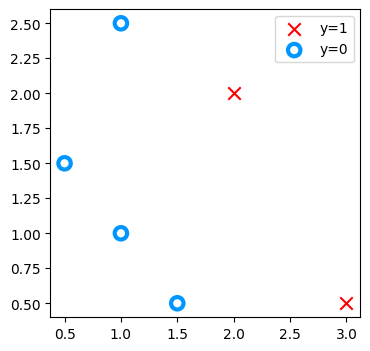

In [29]:
pos_label="y=1"
neg_label="y=0"
fig, ax = plt.subplots(1,1,figsize=(4,4))

pos = y_train == 1
neg = y_train == 0
# print("fuck : ", pos.shape)

# Plot examples
ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

In [33]:
def compute_cost_logistic(X, y, w, b):


    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

    cost = cost / m
    return cost

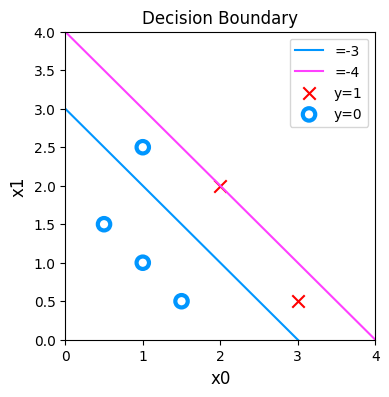

In [32]:
# Choose values between 0 and 6
x0 = np.arange(0,6)

# Plot the two decision boundaries
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1, 1, figsize=(4,4))
# Plot the decision boundary
ax.plot(x0,x1, c='#0096ff', label="=-3")
ax.plot(x0,x1_other, c='#FF40FF', label="=-4")
ax.axis([0, 4, 0, 4])

# Plot the original data

ax.scatter(X_train[pos, 0], X_train[pos, 1], marker='x', s=80, c = 'red', label=pos_label)
ax.scatter(X_train[neg, 0], X_train[neg, 1], marker='o', s=80, label=neg_label, facecolors='none', edgecolors='#0096ff', lw=3)
ax.legend(loc='best' )

ax.figure.canvas.toolbar_visible = False
ax.figure.canvas.header_visible = False
ax.figure.canvas.footer_visible = False

ax.axis([0, 4, 0, 4])
ax.set_ylabel('x1', fontsize=12)
ax.set_xlabel('x0', fontsize=12)
plt.legend(loc="upper right")
plt.title("Decision Boundary")
plt.show()

In [9]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print("Cost for b = -3 : ", compute_cost_logistic(X_train, y_train, w_array1, b_1))
print("Cost for b = -4 : ", compute_cost_logistic(X_train, y_train, w_array2, b_2))

Cost for b = -3 :  0.36686678640551745
Cost for b = -4 :  0.5036808636748461
